In [207]:
import matplotlib.pyplot as plt
from random import randrange
from random import sample
import glob
from os import popen
from PIL import Image, ImageDraw

In [199]:
popen('rm -f robot_*.png')

In [46]:
def entorno(n):
    coord = [i + 0.5 for i in range(n)]
    grid  = [(i,j) for i in coord for j in coord]
    data  = {i:'limpio' for i in grid}
    
    s = randrange(n*n)
    sucios = sample(list(data),s)
    
    for i in sucios:
        data[i] = 'sucio'
        
    return(data)

In [47]:
def grid(data,robot,t):
    x = [x for (x,y) in list(data) if data[(x,y)]=='sucio']
    y = [y for (x,y) in list(data) if data[(x,y)]=='sucio']
    
    rx = robot[0]
    ry = robot[1]
    a=rx
    b=ry
    lm = data[(rx,ry)]
    st = 'Estado actual: ' + lm
    
    if lm == 'sucio':
        acc = 'Ejecutando: Limpiar'
        data[(rx,ry)]= 'limpio'
    
    else:
        m = ['arriba', 'izquierda', 'derecha', 'abajo'] 
        if ry==7.5:
            m.remove('arriba')
        if ry==0.5:
            m.remove('abajo')
        if rx==0.5:
            m.remove('izquierda')
        if rx==7.5:
            m.remove('derecha')
        
        g = sample(m,1)
        acc = 'Moverse a: ' + g[0]
        
        if g == ['arriba']:
            ry=ry+1

        elif g == ['abajo']:
            ry=ry-1

        elif g ==['derecha']:
            rx=rx+1

        else:
            rx=rx-1
    
    if t==0:
        ps = 'Posición inicial del Robot: (%i,%i)' %(a+1,b+1)
    else:
        ps = 'Posición actual del Robot: (%i,%i)' %(a+1,b+1)
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(x,y, c='gray', s=600)
    scatter = ax.scatter(a, b, c='r', s=600)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=ps)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=st)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=acc)
    plt.grid(True)
    plt.xlim(0,n)
    plt.ylim(0,n)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('{:s} Paso {:d}'.format('Robot Aspirador', t))
    plt.savefig('robot_' + format(t, '0{:d}'.format(8)) + '.png', bbox_inches='tight')
    #plt.close() 
    

        
    return(rx,ry)

In [208]:
fp_in = "robot_*.png"
fp_out = "robots2.gif"

# https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)

In [136]:
def grid_inicial(data,robot,t):
    x = [x for (x,y) in list(data) if data[(x,y)]=='sucio']
    y = [y for (x,y) in list(data) if data[(x,y)]=='sucio']
    
    rx = robot[0]
    ry = robot[1]
    a=rx
    b=ry
    lm = data[(rx,ry)]
    st = 'Estado actual: ' + lm
    
    if rx != 0.5:
        acc= 'Moverse a: izquierda'
        rx = rx-1
        
    elif ry!=0.5:
        acc='Moverse a abajo'
        ry = ry-1
        
    else:
        acc='Llegaste al inicio'

    if t==0:
        ps = 'Posición inicial del Robot: (%i,%i)' %(a+1,b+1)
    else:
        ps = 'Posición actual del Robot: (%i,%i)' %(a+1,b+1)
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(x,y, c='gray', s=600)
    scatter = ax.scatter(a, b, c='r', s=600)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=ps)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=st)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=acc)
    plt.grid(True)
    plt.xlim(0,n)
    plt.ylim(0,n)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('{:s} Paso {:d}'.format('Robot Aspirador', t))
    plt.savefig('robot_' + format(t, '0{:d}'.format(8)) + '.png', bbox_inches='tight')
    #plt.close() 
    

        
    return(rx,ry)

In [136]:
def grid_limpiar(data,robot,t):
    x = [x for (x,y) in list(data) if data[(x,y)]=='sucio']
    y = [y for (x,y) in list(data) if data[(x,y)]=='sucio']
    
    rx = robot[0]
    ry = robot[1]
    a=rx
    b=ry
    lm = data[(rx,ry)]
    st = 'Estado actual: ' + lm
    else:
        m = ['arriba', 'izquierda', 'derecha'] 
        if ry==7.5:
            m.remove('arriba')
        if ry==0.5:
            m.remove('abajo')
        if rx==0.5:
            m.remove('izquierda')
        if rx==7.5:
            m.remove('derecha')
        
        g = sample(m,1)
        acc = 'Moverse a: ' + g[0]
        
        if g == ['arriba']:
            ry=ry+1

        elif g == ['abajo']:
            ry=ry-1

        elif g ==['derecha']:
            rx=rx+1

        else:
            rx=rx-1
    
    

    if t==0:
        ps = 'Posición inicial del Robot: (%i,%i)' %(a+1,b+1)
    else:
        ps = 'Posición actual del Robot: (%i,%i)' %(a+1,b+1)
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(x,y, c='gray', s=600)
    scatter = ax.scatter(a, b, c='r', s=600)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=ps)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=st)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=acc)
    plt.grid(True)
    plt.xlim(0,n)
    plt.ylim(0,n)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('{:s} Paso {:d}'.format('Robot Aspirador', t))
    plt.savefig('robot_' + format(t, '0{:d}'.format(8)) + '.png', bbox_inches='tight')
    #plt.close() 
    

        
    return(rx,ry)

In [198]:
def grid2(data,robot,t):
    x = [x for (x,y) in list(data) if data[(x,y)]=='sucio']
    y = [y for (x,y) in list(data) if data[(x,y)]=='sucio']
    
    rx = robot[0]
    ry = robot[1]
    
    rx2 = robot[2]
    ry2 = robot[3]
    
    a=rx
    b=ry
    
    c=rx2
    d=ry2
    
    lm1 = data[(rx,ry)]
    st1 = '(1)Estado actual: ' + lm1
    
    lm2 = data[(rx2,ry2)]
    st2 = '(2)Estado actual: ' + lm2
    
    if lm1 == 'sucio':
        acc1 = '(1)Ejecutando: Limpiar'
        data[(rx,ry)]= 'limpio'
    
    else:
        m = mov(rx,ry)
        if m[0]==rx2 and m[2]==ry2:
            acc1 = '(1) No me muevo, posición ocupada'
        else:
            rx = m[0]
            ry = m[1]
            acc1 = '(1)Moverse a: ' + m[2]
        
    if lm2 == 'sucio':
        acc2 = '(2)Ejecutando: Limpiar'
        data[(rx2, ry2)] = 'limpio'
    
    else:
        q = mov(rx2,ry2)
        if q[0]==rx and q[1]==ry:
            acc2= '(2) No me muevo, posición ocupada'
        else:
            rx2 = q[0]
            ry2 = q[1]
            acc2 = '(2)Moverse a: ' + q[2]
    
    if t==0:
        ps1 = 'Posición inicial del Robot(1): (%i,%i)' %(a+1,b+1)
        ps2 = 'Posición inicial del Robot(2): (%i,%i)' %(c+1,d+1)
    else:
        ps1 = 'Posición actual del Robot(1): (%i,%i)' %(a+1,b+1)
        ps2 = 'Posición actual del Robot(2): (%i,%i)' %(c+1,d+1)
    
    fig, ax = plt.subplots()
    scatter = ax.scatter(x,y, c='gray', s=600)
    scatter = ax.scatter(a, b, c='r', s=600)
    scatter = ax.scatter(c, d, c='b', s=600)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=ps1)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=ps2)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=st1)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=st2)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=acc1)
    scatter = ax.scatter(0,0, c='w', s=0.01, label=acc2)
    plt.grid(True)
    plt.xlim(0,n)
    plt.ylim(0,n)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('{:s} Paso {:d}'.format('Robot Aspirador', t))
    plt.savefig('robot_' + format(t, '0{:d}'.format(8)) + '.png', bbox_inches='tight')
    plt.close() 
    

        
    return(rx,ry,rx2,ry2)

In [166]:
def mov(x,y):
    m = ['arriba', 'izquierda', 'derecha', 'abajo'] 
    if y==7.5:
        m.remove('arriba')
    if y==0.5:
        m.remove('abajo')
    if x==0.5:
        m.remove('izquierda')
    if x==7.5:
        m.remove('derecha')
        
    g = sample(m,1)
    
        
    if g == ['arriba']:
        y=y+1

    elif g == ['abajo']:
        y=y-1
        
    elif g ==['derecha']:
        x=x+1

    else:
        x=x-1
    
    r = [x,y,g[0]]
    return(r)

In [167]:
mov(4.5,2.5)

[3.5, 2.5, 'izquierda']

In [ ]:
n=8
data=entorno(n)
coord=[i+0.5 for i in range(n)]
robot=sample(coord,2)
robot = grid(data,robot,0)
pos = []
pos.append((robot[0],robot[1]))

t=0
while len(pos)<n*n: 
    robot=grid(data,robot,t+1)
    pos.append(robot)
    pos=list(set(pos))
    t=t+1
    

In [169]:
robot=sample(coord,4)

In [170]:
robot

[2.5, 3.5, 5.5, 6.5]

In [151]:
n=8
data=entorno(n)

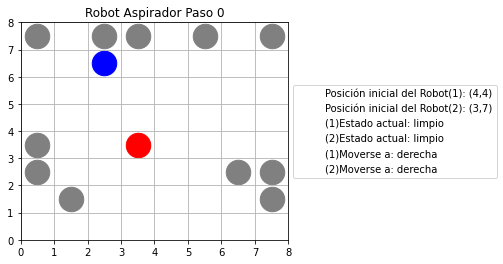

In [194]:
robot=grid2(data,robot,0)

In [197]:
for w in range (50):
    robot = grid2(data,robot,w)

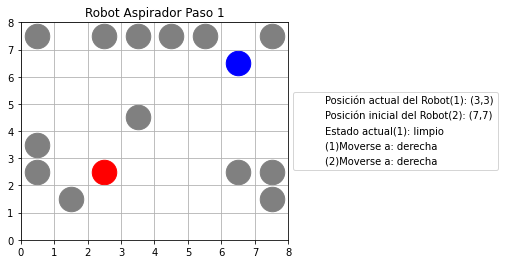

In [188]:
robot=grid2(data,robot,1)

In [202]:
n=8
data=entorno(n)
coord=[i+0.5 for i in range(n)]
robot=sample(coord,4)

pos1 = []
pos2 = []
pos1.append((robot[0],robot[1]))
pos2.append((robot[2],robot[3]))

t=0
while len(pos1)<n*n and len(pos2)<n*n: 
    robot=grid2(data,robot,t+1)
    pos1.append((robot[0],robot[1]))
    pos1=list(set(pos1))
    
    pos2.append((robot[2],robot[3]))
    pos2=list(set(pos2))
    
    
    t=t+1
    

In [203]:
popen('convert -delay 100 -size 300x300 robot_*.png -loop 0 robots.gif')